# Analysis of RTO data

In [1]:
from nbimports import *

In [2]:
import processing
processing = reload(processing)

In [158]:
# filename = "../data/user/data_25042022_170416.csv"
filename = "../data/user/data_26042022_182920.csv"

## all strokes

In [159]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [160]:
data_df = processing.format_data(select(data, source='/data'))

In [161]:
data_df.head()

key      t0  ts  stroke_id         x         y         p        x_  \
0  223155_50  223155  50          7  0.108465  0.922634  0.016437 -0.000808   
1  223168_60  223168  60          7  0.107795  0.923251  0.019668 -0.001477   
2  223181_70  223181  70          7  0.107020  0.923929  0.022609 -0.002252   
3  223181_80  223181  80          7  0.106651  0.924164  0.022216 -0.002621   
4  223194_90  223194  90          7  0.105952  0.924211  0.021473 -0.003320   

         y_        p_        x0        y0        p0        x1        y1  \
0  0.000759  0.012175 -0.000011  0.000010  0.000634 -0.000005  0.000004   
1  0.001376  0.015406 -0.000035  0.000032  0.001471 -0.000012  0.000011   
2  0.002054  0.018348 -0.000086  0.000079  0.002857 -0.000027  0.000025   
3  0.002289  0.017955 -0.000183  0.000169  0.004819 -0.000053  0.000049   
4  0.002336  0.017212 -0.000349  0.000322  0.007260 -0.000094  0.000086   

         p1  
0  0.000210  
1  0.000431  
2  0.000760  
3  0.001180  
4  0.001638

<AxesSubplot:>

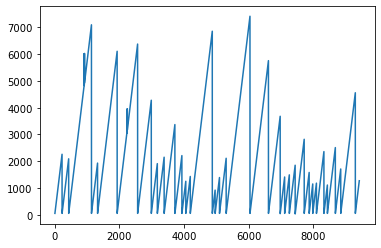

In [162]:
# data['timestamp'].plot()
data_df['ts'].plot()

In [163]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

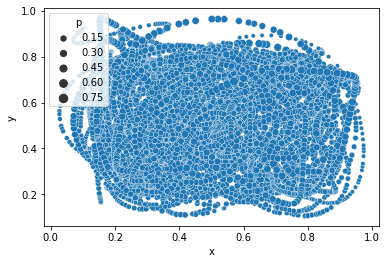

In [164]:
sns.scatterplot(data=data_df, x='x', y='y', size='p')

In [165]:
stroke_id_list = list(set(data_df['stroke_id']))
min(stroke_id_list), max(stroke_id_list)

(7, 41)

<AxesSubplot:xlabel='x', ylabel='y'>

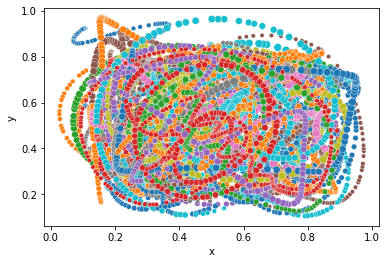

In [166]:
sns.scatterplot(data=data_df, x='x', y='y', size='p', hue='stroke_id', palette='tab10', legend=False)

In [167]:
data.shape

(18815, 2)

In [168]:
import plotly.graph_objs as go

In [169]:
hovertext = np.c_[data_df['stroke_id'].index, data_df['stroke_id'].values].astype(int)

In [170]:
data_df.columns

Index(['key', 't0', 'ts', 'stroke_id', 'x', 'y', 'p', 'x_', 'y_', 'p_', 'x0',
       'y0', 'p0', 'x1', 'y1', 'p1'],
      dtype='object')

<AxesSubplot:>

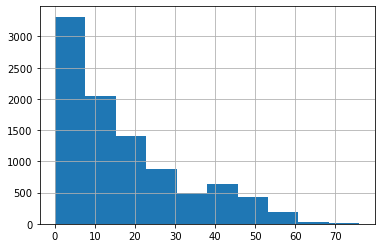

In [171]:
(data_df['p']*100).hist()

In [172]:
import sklearn.preprocessing as skprep
mms = skprep.MinMaxScaler(feature_range=(10, 80))
p_scaled = mms.fit_transform(data_df['p'].values.reshape(-1,1))

In [173]:
colors = ["rgba"+str(tab10[int(i)%10]+(1,)) for i in data_df['stroke_id']]

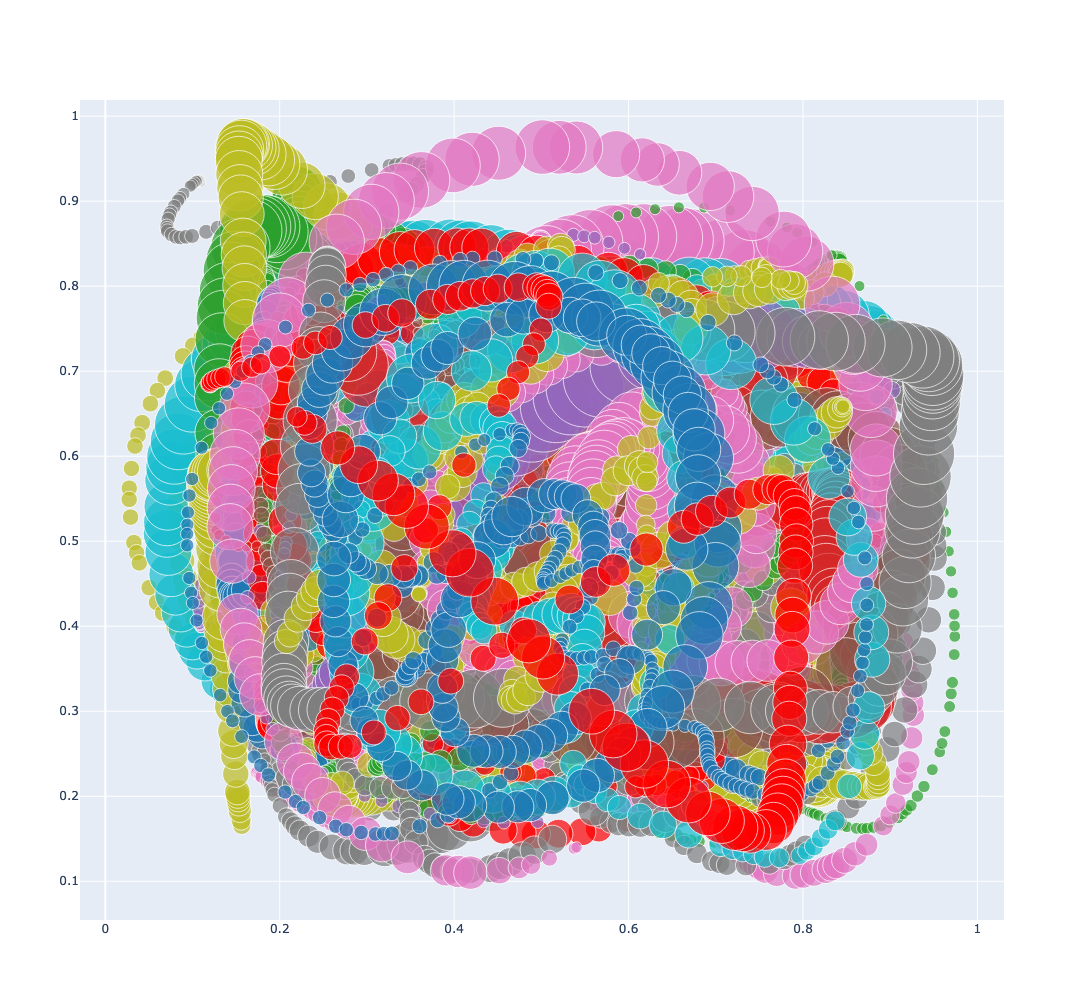

In [174]:
fig = go.Figure()
scatter = go.Scatter(x=data_df['x'], y=data_df['y'], 
                     opacity=1, marker={'size':p_scaled, 'color':colors}, 
                     customdata=hovertext, 
                     hovertemplate='%{customdata[1]}[%{customdata[0]}]',
                     mode='markers',
                    )
fig.add_trace(scatter)
scatter = fig.data[0]

fig.update_layout(
    # autosize=False,
    width=1000,
    height=1000,
)
fig

## one stroke

In [121]:
stroke_i = select(data_df, stroke_id=100)

In [175]:
stroke_i.head()

key        t0  ts  stroke_id         x         y         p  \
1038  38226608_50  38226608  50        100  0.215914  0.271741  0.026708   
1039  38226621_60  38226621  60        100  0.215164  0.276236  0.027382   
1040  38226621_70  38226621  70        100  0.213741  0.284992  0.029611   
1041  38226638_80  38226638  80        100  0.212795  0.291928  0.031661   
1042  38226659_90  38226659  90        100  0.212002  0.298642  0.033485   

            x_        y_        p_        x0        y0        p0        x1  \
1038 -0.002579  0.010450 -0.000053 -0.000009  0.000032 -0.000083 -0.000005   
1039 -0.003329  0.014944  0.000621 -0.000042  0.000154 -0.000176 -0.000018   
1040 -0.004752  0.023700  0.002850 -0.000140  0.000527 -0.000301 -0.000050   
1041 -0.005698  0.030636  0.004900 -0.000359  0.001402 -0.000416 -0.000112   
1042 -0.006491  0.037351  0.006723 -0.000759  0.003086 -0.000442 -0.000212   

            y1        p1  
1038  0.000019 -0.000026  
1039  0.000069 -0.000047  
1040  0.000193 -0.000070  
1041  0.000448 -0.000082  
1042  0.000892 -0.000060

## features

In [187]:
import processing
processing = reload(processing)

In [188]:
feat_df = processing.format_feat(select(data, source='/feat'))

In [189]:
np.count_nonzero(feat_df.groupby('segment_id').size() < 11)

55

<AxesSubplot:>

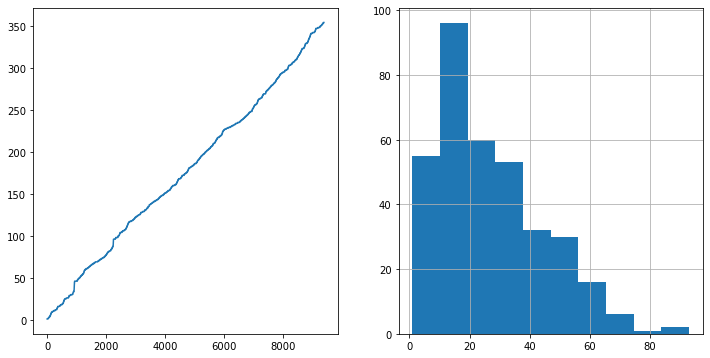

In [190]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
feat_df['segment_id'].plot(ax=ax[0])
feat_df.groupby('segment_id').size().hist(ax=ax[1])

The scale of the different features should be comparable for the DTW to take them into account equally. Alternatively, we could compute a Mahalanobis distance from a small batch of data.

<AxesSubplot:>

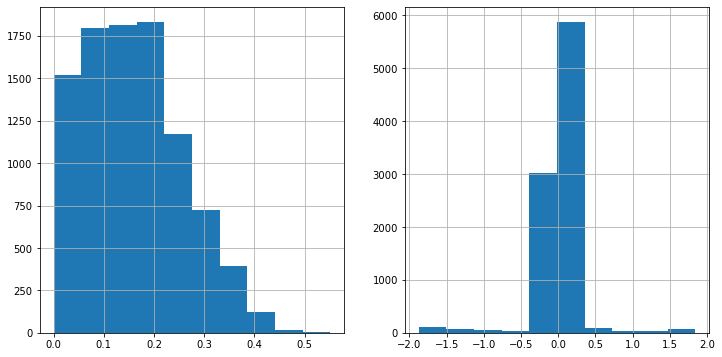

In [191]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
feat_df['s'].hist(ax=ax[0])
feat_df['da'].hist(ax=ax[1])

### for one segment, get data from strokes

In [128]:
gi = feat_df.groupby('segment_id').get_group(2)

In [129]:
gi = gi.join(data_df.set_index('key'), on='key').copy()

In [130]:
gi.head()

key  segment_id         s        da    min_dtw min_dtw_id  \
68  38202775_730           2  0.065554 -0.192539  25.040392          0   
69  38202787_740           2  0.066731 -0.192539  25.040392          0   
70  38202808_750           2  0.068921 -0.192539  25.040392          0   
71  38202808_760           2  0.072445 -0.186693  25.040392          0   
72  38202821_770           2  0.077412 -0.169870  25.040392          0   

          t0   ts  stroke_id         x  ...         p        x_        y_  \
68  38202775  730         94  0.447741  ...  0.021823  0.118845 -0.107585   
69  38202787  740         94  0.438142  ...  0.020639  0.109247 -0.127998   
70  38202808  750         94  0.431755  ...  0.020530  0.102859 -0.139191   
71  38202808  760         94  0.427121  ...  0.020963  0.098225 -0.145774   
72  38202821  770         94  0.416522  ...  0.022920  0.087626 -0.158337   

          p_        x0        y0        p0        x1        y1        p1  
68  0.001766  0.121387 -0.063997 -0.000675  0.004748 -0.004520 -0.000958  
69  0.000582  0.123802 -0.070858 -0.001156  0.003914 -0.005404 -0.000797  
70  0.000473  0.124824 -0.078472 -0.001238  0.002865 -0.006268 -0.000552  
71  0.000906  0.124457 -0.086615 -0.000925  0.001652 -0.007054 -0.000251  
72  0.002863  0.122776 -0.095178 -0.000323  0.000353 -0.007733  0.000062  

[5 rows x 21 columns]

In [131]:
gi.columns

Index(['key', 'segment_id', 's', 'da', 'min_dtw', 'min_dtw_id', 't0', 'ts',
       'stroke_id', 'x', 'y', 'p', 'x_', 'y_', 'p_', 'x0', 'y0', 'p0', 'x1',
       'y1', 'p1'],
      dtype='object')

### get all segments from one stroke

In [132]:
stroke_i_feat = stroke_i.join(feat_df.set_index('key'), on='key').dropna()

In [137]:
np.array(set(stroke_i_feat['segment_id']))

array({18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0}, dtype=object)

In [138]:
colors = [tab10[int(i)%10] for i in stroke_i_feat['segment_id']]

<AxesSubplot:xlabel='x', ylabel='y'>

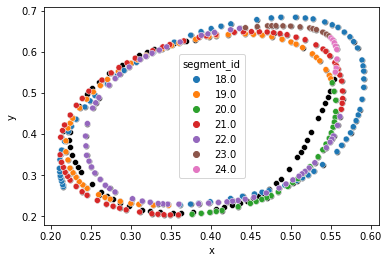

In [139]:
sns.scatterplot(data=stroke_i, x='x', y='y', color='black')
sns.scatterplot(data=stroke_i_feat, x='x', y='y', hue='segment_id', palette='tab10')

In [156]:
stroke_i_feat.head()

key        t0  ts  stroke_id         x         y         p  \
1038  38226608_50  38226608  50        100  0.215914  0.271741  0.026708   
1039  38226621_60  38226621  60        100  0.215164  0.276236  0.027382   
1040  38226621_70  38226621  70        100  0.213741  0.284992  0.029611   
1041  38226638_80  38226638  80        100  0.212795  0.291928  0.031661   
1042  38226659_90  38226659  90        100  0.212002  0.298642  0.033485   

            x_        y_        p_  ...        y0        p0        x1  \
1038 -0.002579  0.010450 -0.000053  ...  0.000032 -0.000083 -0.000005   
1039 -0.003329  0.014944  0.000621  ...  0.000154 -0.000176 -0.000018   
1040 -0.004752  0.023700  0.002850  ...  0.000527 -0.000301 -0.000050   
1041 -0.005698  0.030636  0.004900  ...  0.001402 -0.000416 -0.000112   
1042 -0.006491  0.037351  0.006723  ...  0.003086 -0.000442 -0.000212   

            y1        p1  segment_id         s        da   min_dtw  min_dtw_id  
1038  0.000019 -0.000026        18.0  0.000196 -0.008143  5.703082           6  
1039  0.000069 -0.000047        18.0  0.000710 -0.008143  5.703082           6  
1040  0.000193 -0.000070        18.0  0.001996 -0.008143  5.703082           6  
1041  0.000448 -0.000082        18.0  0.004619 -0.009355  5.703082           6  
1042  0.000892 -0.000060        18.0  0.009167 -0.010552  5.703082           6  

[5 rows x 21 columns]

<AxesSubplot:xlabel='ts', ylabel='s'>

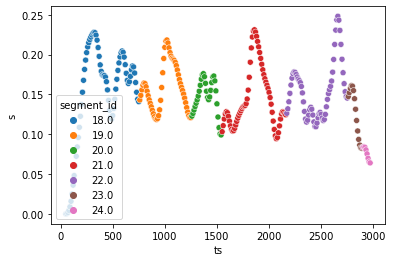

In [157]:
sns.scatterplot(data=stroke_i_feat, x='ts', y='s', hue='segment_id', palette='tab10')

In [140]:
feat_df

key  segment_id         s        da       min_dtw min_dtw_id
0       38202117_50           1  0.000058  0.026903  10000.000000          0
1       38202117_60           1  0.000154  0.026903  10000.000000          0
2       38202117_70           1  0.000341  0.026903  10000.000000          0
3       38202130_80           1  0.000666  0.061275  10000.000000          0
4       38202143_90           1  0.001199  0.108008  10000.000000          0
...             ...         ...       ...       ...           ...        ...
8008  38340247_1890         183  0.216379  0.052954      3.719978         76
8009  38340268_1900         183  0.214366  0.055729      3.719978         76
8010  38340268_1910         183  0.208042  0.062698      3.719978         76
8011  38340281_1920         183  0.200550  0.062698      3.719978         76
8012  38340281_1930         183  0.195982  0.062698      3.719978         76

[8013 rows x 6 columns]

## check closest neighbours

In [152]:
min_dtw_id = feat_df.groupby('segment_id').first()['min_dtw_id'].values
min_dtw = feat_df.groupby('segment_id').first()['min_dtw'].values

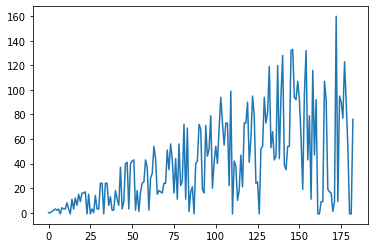

In [151]:
plt.plot(min_dtw_id)

(array([76., 47., 26., 12.,  5.,  2.,  0.,  1.,  1.,  0.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

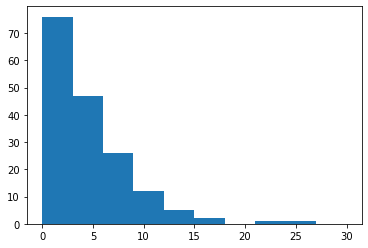

In [155]:
plt.hist(min_dtw, range=(0, 30))

## check data processing

The angle provided by arctan2 is succeptible to wrap around. This can be accomodated with np.unwrap. However, it is currently not implemented in the js code.

In [ ]:
filename = "../data/user/data_25042022_170416.csv"

In [54]:
gi = feat_df.groupby('segment_id').get_group(2)

In [55]:
gi = gi.join(data_df.set_index('key'), on='key').copy()

<AxesSubplot:>

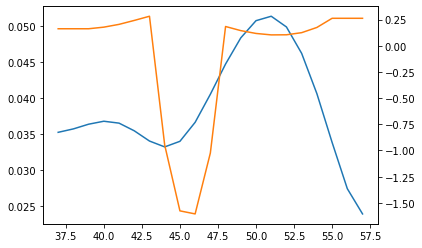

In [56]:
fig, ax = plt.subplots()
gi['s'].plot(ax=ax)
axt = ax.twinx()
gi['da'].plot(ax=axt, c=tab10[1])

In [31]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [32]:
alpha = np.arctan2(gi['y1'], gi['x1'])
da = scsig.savgol_filter(alpha, deriv=1, **savgol_dict)

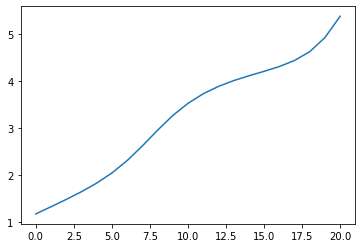

In [33]:
plt.plot(np.unwrap(alpha))

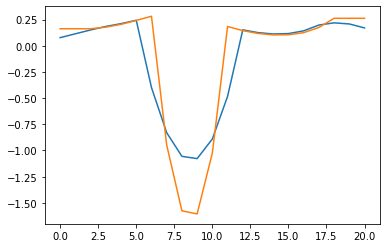

In [34]:
plt.plot(da)
plt.plot(gi['da'].values)

<AxesSubplot:xlabel='x', ylabel='y'>

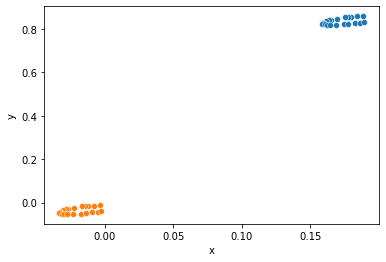

In [35]:
sns.scatterplot(data=gi, x='x', y='y')
sns.scatterplot(data=gi, x='x_', y='y_')

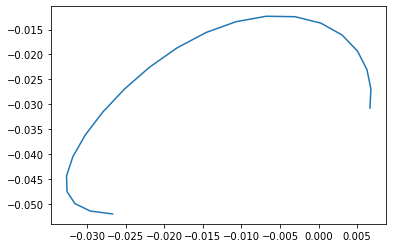

In [36]:
plt.plot(gi['x0'], gi['y0'])

In [37]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [38]:
gi['x1_'] = scsig.savgol_filter(gi['x0'], deriv=1, **savgol_dict)
gi['y1_'] = scsig.savgol_filter(gi['y0'], deriv=1, **savgol_dict)

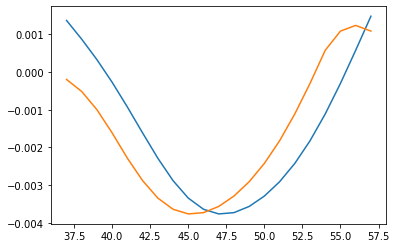

In [39]:
plt.plot(gi['x1'])
plt.plot(gi['x1_'])

In [40]:
s = np.linalg.norm(gi[['x1', 'y1']], axis=1)

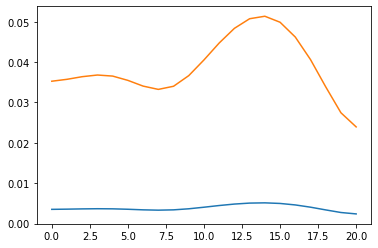

In [41]:
plt.plot(s)
plt.plot(gi['s'].values)

In [42]:
alpha = np.arctan2(gi['y1'], gi['x1'])

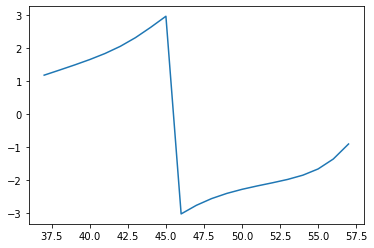

In [43]:
plt.plot(alpha)